# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
data = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [40]:
# Create an empty list
mars_data = {}

# Loop through the scraped data to create a list of rows
rows = data.find_all('tr')
for row in rows:
    row_heading = row.find('th')
    row_data = row.find('td')
    mars_data[row_heading] = row_data

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')

mars_data = df[0]

mars_data.columns=['ID', 'Terrestial_Date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [8]:
# Confirm DataFrame was created successfully
mars_data

,ID,Terrestial_Date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_data.dtypes

ID                   int64
Terrestial_Date     object
sol                  int64
ls                   int64
month                int64
min_temp           float64
pressure           float64
dtype: object

In [10]:
# Change data types for data analysis
mars_data['Terrestial_Date'] = pd.to_datetime(mars_data['Terrestial_Date'])
mars_data['month'] = pd.to_datetime(mars_data['month'], format='%m').dt.month_name()
mars_data

,ID,Terrestial_Date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,June,-75.0,739.0
1,13,2012-08-17,11,156,June,-76.0,740.0
2,24,2012-08-18,12,156,June,-76.0,741.0
3,35,2012-08-19,13,157,June,-74.0,732.0
4,46,2012-08-20,14,157,June,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,May,-78.0,730.0
1863,1892,2018-02-24,1974,134,May,-77.0,729.0
1864,1894,2018-02-25,1975,134,May,-76.0,729.0
1865,1893,2018-02-26,1976,135,May,-77.0,728.0


In [11]:
# Confirm type changes were successful by examining data types again
mars_data.dtypes

ID                          int64
Terrestial_Date    datetime64[ns]
sol                         int64
ls                          int64
month                      object
min_temp                  float64
pressure                  float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
mars_data['month'].nunique()

12

In [13]:
# 2. How many Martian days' worth of data are there?
mars_data['sol'].nunique()

1867

In [16]:
# 3. What is the average low temperature by month?
avg_low_temp_by_month = mars_data.groupby('month')['min_temp'].mean()
avg_low_temp_by_month

month
April       -82.747423
August      -68.382979
December    -74.451807
February    -79.932584
January     -77.160920
July        -72.281690
June        -75.299320
March       -83.307292
May         -79.308725
November    -71.985507
October     -71.982143
September   -69.171642
Name: min_temp, dtype: float64

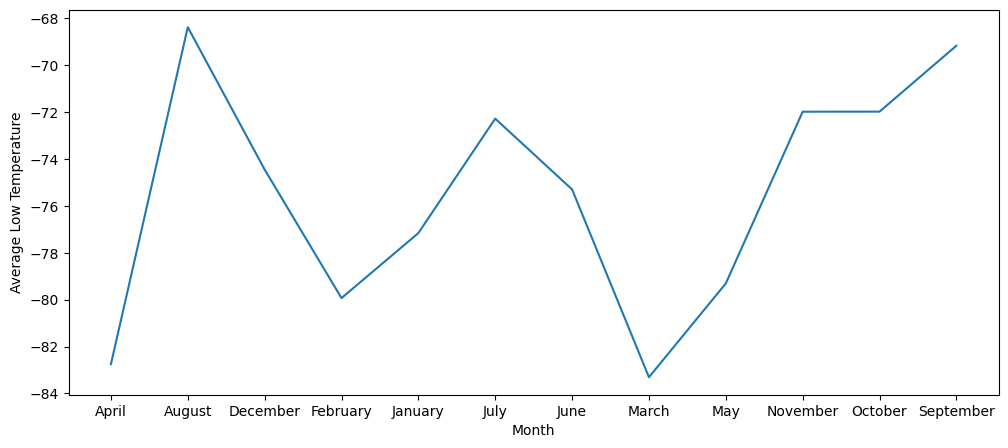

In [27]:
# Plot the average temperature by month
plt.figure(figsize=(12, 5))
plt.plot(avg_low_temp_by_month.index, avg_low_temp_by_month.values)
plt.xlabel('Month')
plt.ylabel('Average Low Temperature')
plt.show()

In [29]:
# Identify the coldest and hottest months in Curiosity's location
avg_low_temp_by_month.min()

-83.30729166666667

In [30]:
# 4. Average pressure by Martian month
avg_pressure_by_month = mars_data.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
April        806.329897
August       873.829787
December     842.156627
February     889.455056
January      862.488506
July         795.105634
June         745.054422
March        877.322917
May          748.557047
November     857.014493
October      887.312500
September    913.305970
Name: pressure, dtype: float64

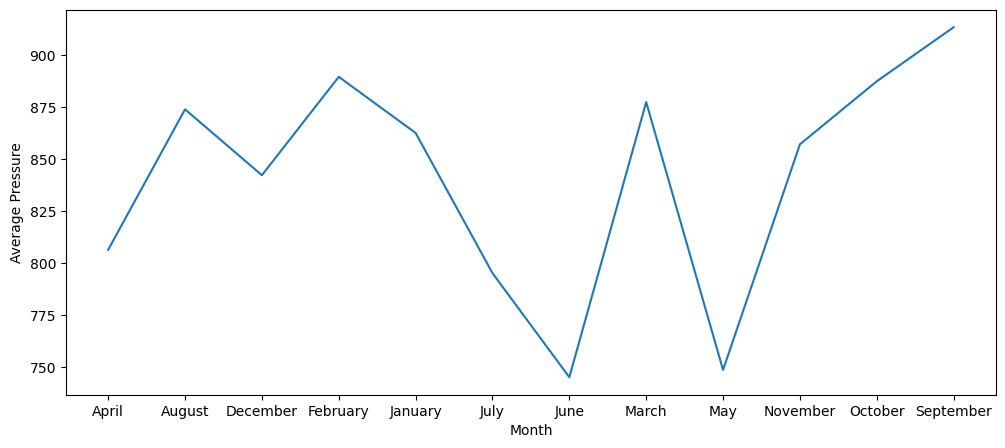

In [31]:
# Plot the average pressure by month
plt.figure(figsize=(12, 5))
plt.plot(avg_pressure_by_month.index, avg_pressure_by_month.values)
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.show()

In [36]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_data['Terrestial_Date'].count()

1867

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [37]:
# Write the data to a CSV
mars_data.to_csv('Mars_Data.csv')

In [41]:
browser.quit()